In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import io

%matplotlib inline

In [2]:
databyWeek=pd.read_excel("DatabyWeek-135-8years.xlsx") #databyWeek=pd.read_excel("DatabyWeek-135-3years.xlsx",index_col="Week")

In [3]:
index=pd.date_range(start='1/3/2011',periods=417, freq='W',name='Date')

In [4]:
index[260]

Timestamp('2016-01-03 00:00:00', freq='W-SUN')

In [5]:
index=index.delete(260)

In [6]:
index.shape, index , type(index)

((416,),
 DatetimeIndex(['2011-01-09', '2011-01-16', '2011-01-23', '2011-01-30',
                '2011-02-06', '2011-02-13', '2011-02-20', '2011-02-27',
                '2011-03-06', '2011-03-13',
                ...
                '2018-10-28', '2018-11-04', '2018-11-11', '2018-11-18',
                '2018-11-25', '2018-12-02', '2018-12-09', '2018-12-16',
                '2018-12-23', '2018-12-30'],
               dtype='datetime64[ns]', name='Date', length=416, freq=None),
 pandas.core.indexes.datetimes.DatetimeIndex)

In [7]:
databyWeekTruck=databyWeek["Truck"].values.reshape(-1,1)

In [8]:
databyWeek=pd.DataFrame(data=databyWeekTruck,index=index, columns=['Truck'])

In [9]:
type(databyWeek['Truck']), type(databyWeek['Truck'][0]), type(databyWeek.index), type(databyWeek.index[0])

(pandas.core.series.Series,
 numpy.int64,
 pandas.core.indexes.datetimes.DatetimeIndex,
 pandas._libs.tslibs.timestamps.Timestamp)

In [10]:
# pd.DataFrame(databyDay.groupby(databyDay["Week"])["Truck"].sum())
# databyWeek=databyWeek.drop(columns="Chw",axis=1) 

In [11]:
databyWeek.head()

,Truck
Date,
2011-01-09,10
2011-01-16,6
2011-01-23,12
2011-01-30,11
2011-02-06,6


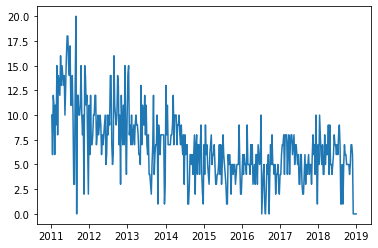

In [12]:
plt.plot(databyWeek.index,databyWeek["Truck"])

In [13]:
databyWeek.describe()

,Truck
count,416.000000
mean,6.901442
std,3.497662
min,0.000000
25%,5.000000
50%,7.000000
75%,9.000000
max,20.000000


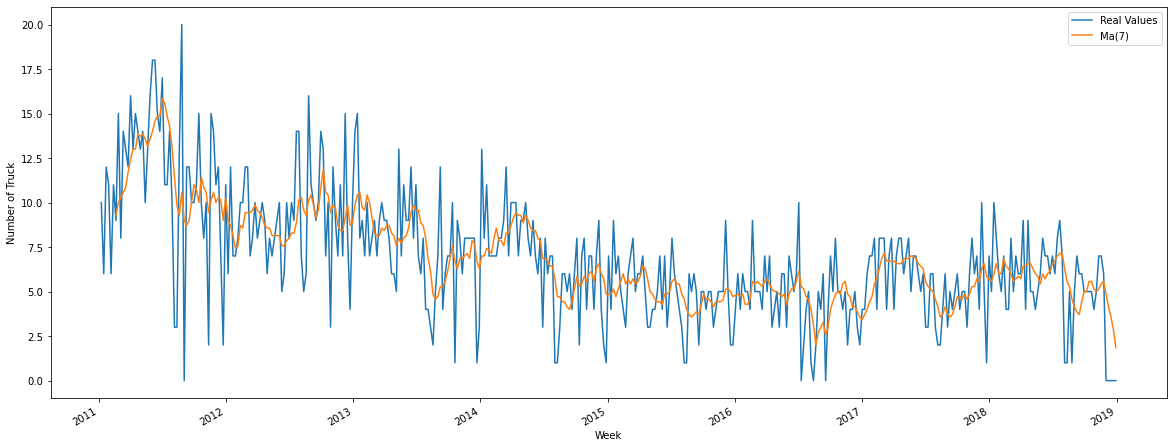

In [14]:
databyWeek["Truck"].plot(figsize=(20,6),label="Real Values")
databyWeek["Truck"].rolling(window=7).mean().plot(figsize=(20,8),label="Ma(7)")
plt.xlabel("Week")
plt.ylabel("Number of Truck")
plt.legend()

# Exponential Smothing Models
# Simple Exponential Smothing

In [15]:
from statsmodels.tsa.api import SimpleExpSmoothing, ExponentialSmoothing, Holt

In [16]:
databyWeek.index = pd.DatetimeIndex(databyWeek.index).to_period('W')

In [17]:
databyWeek=databyWeek.to_timestamp(freq='W')

In [18]:
SES=SimpleExpSmoothing(databyWeek)

C:\Users\mert_\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\mert_\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [19]:
fit1=SES.fit(smoothing_level=0.2,optimized=False)

In [20]:
fit1.fittedvalues

Date
2011-01-09    10.000000
2011-01-16    10.000000
2011-01-23     9.200000
2011-01-30     9.760000
2011-02-06    10.008000
                ...    
2018-12-02     5.730046
2018-12-09     4.584037
2018-12-16     3.667229
2018-12-23     2.933784
2018-12-30     2.347027
Length: 416, dtype: float64

In [21]:
fit1.params_formatted

,name,param,optimized
smoothing_level,alpha,0.2,False
initial_level,l.0,10.0,False


In [22]:
# Model Selection Criteria(AIC,AICc,BIC)

fit1.aic, fit1.aicc, fit1.bic

(825.5669868357512, 825.6643104367245, 833.6283573562737)

In [23]:
forecast1=fit1.forecast(3)
forecast1

C:\Users\mert_\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


416    1.877622
417    1.877622
418    1.877622
dtype: float64